**Ejercisios basicos con KERAS y NLTK**

# **ACTIVIDAD 1: EJEMPLO DE TOKENIZACION DE DATOS**



In [4]:
#Instalacion de librerias
!pip install -U tensorflow
!pip install tensorflow_text
!pip install keras


In [5]:
#Importacion de librerias
from tensorflow.keras.preprocessing.text import Tokenizer
import keras
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Creacion de la informacion

frases = [
'Hola mundo',
'Hola a todos',
'Hola a todo el mundo'
]

In [11]:
#Genera el diccionario de tokens
tokenizer = Tokenizer(num_words=10)
tokenizer.fit_on_texts(frases)
word_index = tokenizer.word_index
print('word_index =', word_index)

word_index = {'hola': 1, 'mundo': 2, 'a': 3, 'todos': 4, 'todo': 5, 'el': 6}


In [12]:
#Generacion de secuencia tokenizadas
secuencias = tokenizer.texts_to_sequences(frases)
print('secuencias =', secuencias)

secuencias = [[1, 2], [1, 3, 4], [1, 3, 5, 6, 2]]


In [13]:
#Rellena las secuencias a una longitud uniforme
relleno = keras.preprocessing.sequence.pad_sequences(secuencias)
print('rellena =\n', relleno)

rellena =
 [[0 0 0 1 2]
 [0 0 1 3 4]
 [1 3 5 6 2]]


Ahora procedemos a modificar el codigo para ver nuevos resultados.

En el caso vamos a aumentar el numero de palabras  ver los resultados

In [15]:
frases = [
'Hola mundo',
'Hola a todos',
'Hola a todo el mundo',
'Buen dia, como estas hoy'
]
#Genera el diccionario de tokens
tokenizer = Tokenizer(num_words = 10)
tokenizer.fit_on_texts(frases)
word_index = tokenizer.word_index
print('\nword_index=', word_index)
#Generacion de secuencia tokenizadas
secuencias = tokenizer.texts_to_sequences(frases)
print('secuencias =', secuencias)
#Rellena las secuencias a una longitud uniforme
relleno = keras.preprocessing.sequence.pad_sequences(secuencias)
print('rellena = \n', relleno)


word_index= {'hola': 1, 'mundo': 2, 'a': 3, 'todos': 4, 'todo': 5, 'el': 6, 'buen': 7, 'dia': 8, 'como': 9, 'estas': 10, 'hoy': 11}
secuencias = [[1, 2], [1, 3, 4], [1, 3, 5, 6, 2], [7, 8, 9]]
rellena = 
 [[0 0 0 1 2]
 [0 0 1 3 4]
 [1 3 5 6 2]
 [0 0 7 8 9]]


Ahora usamos el parametro OOV-TOKEN = Parametro para asignar token a textos que no existen en mis datos

In [17]:
frases = [
'Hola mundo',
'Hola a todos',
'Hola a todo el mundo',
'Buen dia, como estas hoy'
]

#Genera el diccionario de tokens
tokenizer = Tokenizer(num_words = 10, oov_token="<00V>")
tokenizer.fit_on_texts(frases)
word_index = tokenizer.word_index
print('\nword_index=', word_index)

#Generacion de secuencia tokenizadas
secuencias = tokenizer.texts_to_sequences(frases)
print('secuencias =', secuencias)

#Rellena las secuencias a una longitud uniforme
relleno = keras.preprocessing.sequence.pad_sequences(secuencias)
print('rellena =\n', relleno)


word_index= {'<00V>': 1, 'hola': 2, 'mundo': 3, 'a': 4, 'todos': 5, 'todo': 6, 'el': 7, 'buen': 8, 'dia': 9, 'como': 10, 'estas': 11, 'hoy': 12}
secuencias = [[2, 3], [2, 4, 5], [2, 4, 6, 7, 3], [8, 9, 1, 1, 1]]
rellena =
 [[0 0 0 2 3]
 [0 0 2 4 5]
 [2 4 6 7 3]
 [8 9 1 1 1]]


Ahora pasamos al uso de los metodos  TRUNCATING Y PADDING

los mismos funcionan para rellenar y/o eliminar caracteres de los textos si estos superan el tamaño del diccionario creado (Padding =Rellena  puede ser antes o despues de la finalizacion de la oracion; truncating = elimina los caracteres que superan al maximo puede ser pre o poost)

In [18]:
frases = [
'Hola mundo',
'Hola a todos',
'Hola a todo el mundo',
'Buen dia, como estas hoy'
]
#Genera el diccionario de tokens
tokenizer = Tokenizer(num_words = 10,oov_token="<00V>")
tokenizer.fit_on_texts(frases)
word_index = tokenizer.word_index
print('\nword_index=', word_index)

#Generacion de secuencia tokenizadas
secuencias = tokenizer.texts_to_sequences(frases)
print('secuencias =', secuencias)

#Rellena las secuencias a una longitud uniforme
relleno = keras.preprocessing.sequence.pad_sequences(secuencias, padding= 'post', truncating='post')
print('rellena =\n', relleno)


word_index= {'<00V>': 1, 'hola': 2, 'mundo': 3, 'a': 4, 'todos': 5, 'todo': 6, 'el': 7, 'buen': 8, 'dia': 9, 'como': 10, 'estas': 11, 'hoy': 12}
secuencias = [[2, 3], [2, 4, 5], [2, 4, 6, 7, 3], [8, 9, 1, 1, 1]]
rellena =
 [[2 3 0 0 0]
 [2 4 5 0 0]
 [2 4 6 7 3]
 [8 9 1 1 1]]




---

# **ACTIVIDAD 2: NLP sobre IMDB DATASET**

Para la actividad usaremos el API de Kaggle, misma que debe ser configurado por parte del usuario en su cuenta. Asi mismo se debe de cargar el .json de autenticacion para poder usarlo.

In [6]:
#creamos la autenticacion con la API de Kagle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Cambiar los permisos del archivo kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset específico
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
#Importacion de librerias
import pandas as pd
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [8]:
# Descomprimir el archivo zip
with zipfile.ZipFile("imdb-dataset-of-50k-movie-reviews.zip", 'r') as zip_ref:
    zip_ref.extractall("imdb_dataset")

In [9]:
# Cargar el dataset en un DataFrame
df = pd.read_csv("imdb_dataset/IMDB Dataset.csv")  # Asegúrate de poner el nombre correcto del archivo CSV
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [90]:
#Exploramos los datos
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [91]:
#Validamos cuantas tipos de etiquetas hay
print("Total: \n", df['sentiment'].value_counts())

Total: 
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


Se crea una lista vacía llamada review para almacenar las revisiones de películas y otra lista llamada
sentences que contiene todas las revisiones en forma de oraciones. La lista sentences se obtiene
convirtiendo la columna 'review' del DataFrame en una lista.

Se recorre cada revisión en la lista de oraciones
sentences y se agrega cada revisión a la lista review.
Esto se hace para convertir la lista de oraciones en
una lista de revisiones completas.

In [92]:
review = []
sentences = list(df['review'])
for sen in sentences:
  review.append(sen)

Se extraen las etiquetas de sentimiento ('positive' o 'negative') del DataFrame IMDB y se convierten en un arreglo NumPy de etiquetas binarias, donde 'positive' se convierte en 1 y 'negative' se convierte en 0. Esto se hace utilizando la función map() y una función lambda.

In [93]:
labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

In [94]:
#Division de datos para entrenamiento
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)

Se definen varios parámetros para la tokenización y el
acolchado de las secuencias de texto, como el tamaño del vocabulario (vocab_size), la longitud máxima de las secuencias (max_length), la dimensión del embedding (embedding_dim), el tipo de truncado (trunc_type) y el token
para palabras fuera del vocabulario (oov_tok).

In [95]:
# Parametrizacion de los datos
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type='post'
oov_tok = "<00V>"

Este código tokeniza y acolcha las secuencias de texto para
que tengan una longitud uniforme y puedan ser utilizadas como entrada para un modelo de aprendizaje automático.

In [96]:
# Iniciamos el proceso de tokenizacion
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generacion del diccionario de datos
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Generacion del padding y truncating de los datos
sequences = tokenizer. texts_to_sequences(train_sentences)
padded = pad_sequences (sequences, maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
test_sequences = tokenizer. texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

In [97]:
#Crecion del modelo (red neuronal)
model = keras.Sequential([
keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
keras.layers.Flatten(),
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')
])

Se compila el modelo utilizando el optimizador 'adam' y la función de pérdida 'binary_crossentropy', ya que se trata de un problema de clasicación binaria.

Se especifica 'accuracy' como la métrica para evaluar el rendimiento del modelo.

Se imprime un resumen del modelo, que muestra la arquitectura de la red neuronal, el número de parámetros entrenables y el flujo de datos a través de las diferentes capas.

In [98]:
# Setup the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#Print the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6828 - loss: 0.5643 - val_accuracy: 0.7990 - val_loss: 0.4263
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8316 - loss: 0.3801 - val_accuracy: 0.8063 - val_loss: 0.4274
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8660 - loss: 0.3099 - val_accuracy: 0.7906 - val_loss: 0.4531
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9049 - loss: 0.2386 - val_accuracy: 0.7801 - val_loss: 0.5345
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9366 - loss: 0.1710 - val_accuracy: 0.7658 - val_loss: 0.6463
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9613 - loss: 0.1126 - val_accuracy: 0.7628 - val_loss: 0.8163
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9802 - loss: 0.0685 - val_accuracy: 0.7560 - val_loss: 1.0476
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9908 - loss: 0.038

<Axes: >

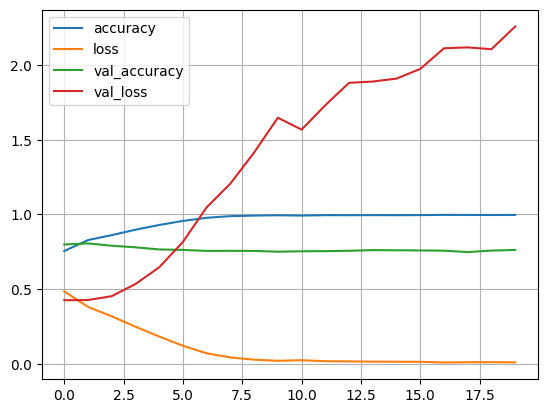

In [99]:
#Train the model
history = model.fit(padded, train_labels, epochs=20, validation_data=(test_padded, test_labels))
# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)



---


# **ACTIVIDAD 3 : REDES NEURONALES RECURRENTES**

Para esta actividad se realiza el mismo proceso inicial de la actividad anterior:

* Descarga del conjunto de datos.
* Preprocesamiento de las secuencias.
* Tokenización y generación de secuencias.
* Construcción y entrenamiento del modelo.

Adicionalmente se Construyen y entrenan otro modelos con el objetivo de comparar los resultados del modelo que usa capas LSTM y el modelo que no las usa.

In [103]:
#Build the model
model = keras.Sequential([
keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
keras.layers.LSTM(64, return_sequences=True),
keras.layers.LSTM(32),
keras.layers.Dense(6, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')
])

In [105]:
#Compilamos el modeloo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [107]:
#Mostramos la info del modelo
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 110ms/step - accuracy: 0.6759 - loss: 0.5796 - val_accuracy: 0.7805 - val_loss: 0.4898
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 134s 107ms/step - accuracy: 0.7977 - loss: 0.4460 - val_accuracy: 0.7380 - val_loss: 0.4959
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 147s 111ms/step - accuracy: 0.8151 - loss: 0.4052 - val_accuracy: 0.8150 - val_loss: 0.4059
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 109ms/step - accuracy: 0.8278 - loss: 0.3871 - val_accuracy: 0.8177 - val_loss: 0.3937
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 110ms/step - accuracy: 0.8323 - loss: 0.3731 - val_accuracy: 0.8110 - val_loss: 0.4368
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 150s 116ms/step - accuracy: 0.8403 - loss: 0.3552 - val_accuracy: 0.8253 - val_loss: 0.3831
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 203s 117ms/step - accuracy: 0.8494 - loss: 0.3416 - val_accuracy: 0.8245 - val_loss: 0.3811
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 190s 108ms/step - ac

<Axes: >

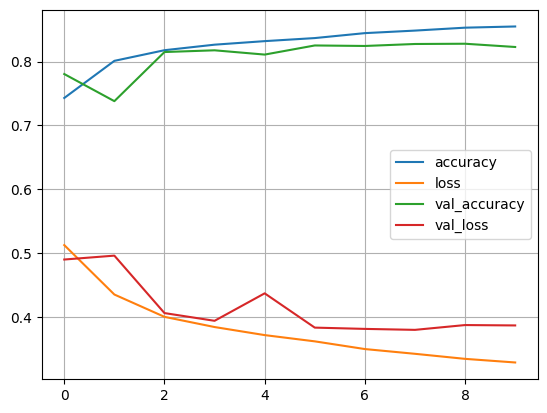

In [108]:
num_epochs = 10
#Entrenamiento del model
history = model.fit(padded,
train_labels,
epochs=num_epochs,
validation_data=(test_padded, test_labels))

#Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)

# **ACTIVIDAD 4: RNN En Español**



In [10]:
#creamos la autenticacion con la API de Kagle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Cambiar los permisos del archivo kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset específico
!kaggle datasets download -d luisdiegofv97/imdb-dataset-of-50k-movie-reviews-spanish

Dataset URL: https://www.kaggle.com/datasets/luisdiegofv97/imdb-dataset-of-50k-movie-reviews-spanish
License(s): other
 89% 47.0M/52.6M [00:00<00:00, 105MB/s] 
100% 52.6M/52.6M [00:00<00:00, 78.9MB/s]


In [11]:
#Importacion de librerias
import pandas as pd
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [12]:
# Descomprimir el archivo zip
with zipfile.ZipFile("imdb-dataset-of-50k-movie-reviews-spanish.zip", 'r') as zip_ref:
    zip_ref.extractall("imdb_dataset_sp")

In [14]:
# Cargar el dataset en un DataFrame
df = pd.read_csv("imdb_dataset_sp/IMDB Dataset SPANISH.csv")  # Asegúrate de poner el nombre correcto del archivo CSV
df.head()

,Unnamed: 0,review_en,review_es,sentiment,sentimiento
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [18]:
#Validamos cuantas tipos de etiquetas hay
print("Total: \n", df['sentimiento'].value_counts())

Total: 
 sentimiento
positivo    25000
negativo    25000
Name: count, dtype: int64


In [19]:
review = []
sentences = list(df['review_es'])
for sen in sentences:
  review.append(sen)

In [21]:
labels = df['sentimiento']
labels = np.array(list(map(lambda x: 1 if x=="positivo" else 0, labels)))

In [22]:
#Division de datos para entrenamiento
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)

In [23]:
# Parametrizacion de los datos
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type='post'
oov_tok = "<00V>"

In [24]:
# Iniciamos el proceso de tokenizacion
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generacion del diccionario de datos
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Generacion del padding y truncating de los datos
sequences = tokenizer. texts_to_sequences(train_sentences)
padded = pad_sequences (sequences, maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
test_sequences = tokenizer. texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

In [25]:
#Crecion del modelo (red neuronal)
model = keras.Sequential([
keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
keras.layers.Flatten(),
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
# Setup the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6473 - loss: 0.5941 - val_accuracy: 0.7596 - val_loss: 0.4791
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8117 - loss: 0.4107 - val_accuracy: 0.7785 - val_loss: 0.4631
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8444 - loss: 0.3498 - val_accuracy: 0.7650 - val_loss: 0.4988
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8904 - loss: 0.2663 - val_accuracy: 0.7583 - val_loss: 0.5635
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9260 - loss: 0.1943 - val_accuracy: 0.7477 - val_loss: 0.6727
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9561 - loss: 0.1342 - val_accuracy: 0.7432 - val_loss: 0.8334
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9776 - loss: 0.0797 - val_accuracy: 0.7415 - val_loss: 0.9927
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9897 - loss: 0.0456

<Axes: >

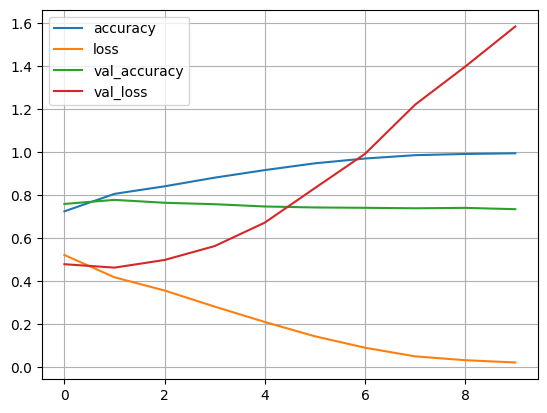

In [27]:
#Train the model
history = model.fit(padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))
# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)